In [1]:
import pandas as pd
data = pd.read_csv('./data/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
data.loc[data['sex']=='male','sex']=0
data.loc[data['sex']=='female','sex']=1
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [5]:
data.loc[data['smoker']=='yes','smoker']=1
data.loc[data['smoker']=='no','smoker']=0
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [6]:
tmp = pd.get_dummies(data['region'], prefix = 'region')
data = data.drop(['region'],axis=1)
data = pd.concat([data,tmp],axis=1)
data

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [7]:
data.describe().style.background_gradient()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


## 이상치 제거

In [10]:
q3 = data.quantile(0.75) 
q1 = data.quantile(0.25)
iqr = q3 - q1
iqr

age                    24.000000
bmi                     8.397500
children                2.000000
charges             11899.625365
region_northeast        0.000000
region_northwest        0.000000
region_southeast        1.000000
region_southwest        0.000000
dtype: float64

In [11]:
def dr_outlier(df):
    quartile_1 = df.quantile(0.25)
    quartile_3 = df.quantile(0.75)
    IQR = quartile_3 - quartile_1
    condition = (df < (quartile_1 - 1.5 * IQR)) | (df > (quartile_3 + 1.5 * IQR))
    condition = condition.any(axis=1)
    search_df = df[condition]
 
    return search_df, df.drop(search_df.index, axis=0)
new_data, _ = dr_outlier(data)
new_data

C:\Users\dmqa\AppData\Local\Temp\ipykernel_17176\3862719363.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  condition = (df < (quartile_1 - 1.5 * IQR)) | (df > (quartile_3 + 1.5 * IQR))


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
7,37,1,27.740,3,0,7281.50560,0,1,0,0
8,37,0,29.830,2,0,6406.41070,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1332,52,1,44.700,3,0,11411.68500,0,0,0,1
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


## 결측치 제거

In [12]:
new_data = new_data.dropna(axis=0)
new_data

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
7,37,1,27.740,3,0,7281.50560,0,1,0,0
8,37,0,29.830,2,0,6406.41070,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1332,52,1,44.700,3,0,11411.68500,0,0,0,1
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


## Columns 순서 재배치

In [13]:
col1 = new_data.columns[-4:].to_list()
col2 = new_data.columns[:-4].to_list()
new_col = col1 + col2
new_data = new_data[new_col]
new_data

,region_northeast,region_northwest,region_southeast,region_southwest,age,sex,bmi,children,smoker,charges
0,0,0,0,1,19,1,27.900,0,1,16884.92400
3,0,1,0,0,33,0,22.705,0,0,21984.47061
4,0,1,0,0,32,0,28.880,0,0,3866.85520
7,0,1,0,0,37,1,27.740,3,0,7281.50560
8,1,0,0,0,37,0,29.830,2,0,6406.41070
...,...,...,...,...,...,...,...,...,...,...
1332,0,0,0,1,52,1,44.700,3,0,11411.68500
1333,0,1,0,0,50,0,30.970,3,0,10600.54830
1334,1,0,0,0,18,1,31.920,0,0,2205.98080
1336,0,0,0,1,21,1,25.800,0,0,2007.94500


C:\Users\dmqa\AppData\Local\Temp\ipykernel_17176\2633289585.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'],kde=False,ax=ax1)
C:\Users\dmqa\AppData\Local\Temp\ipykernel_17176\2633289585.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['children'],kde=False,ax=ax2,color="r

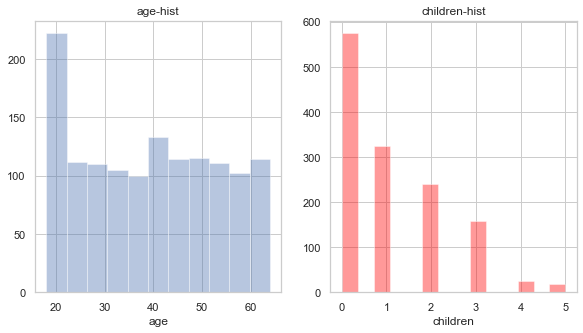

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)

sns.distplot(data['age'],kde=False,ax=ax1)
sns.distplot(data['children'],kde=False,ax=ax2,color="red")

ax1.set_title('age-hist')
ax2.set_title('children-hist')
plt.show()

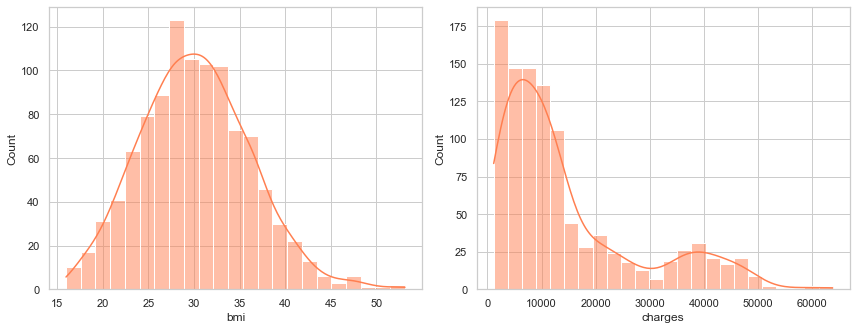

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 18))
for i, col in enumerate(new_data.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=new_data, x=col, ax=ax,color='coral',kde=True)
plt.tight_layout()

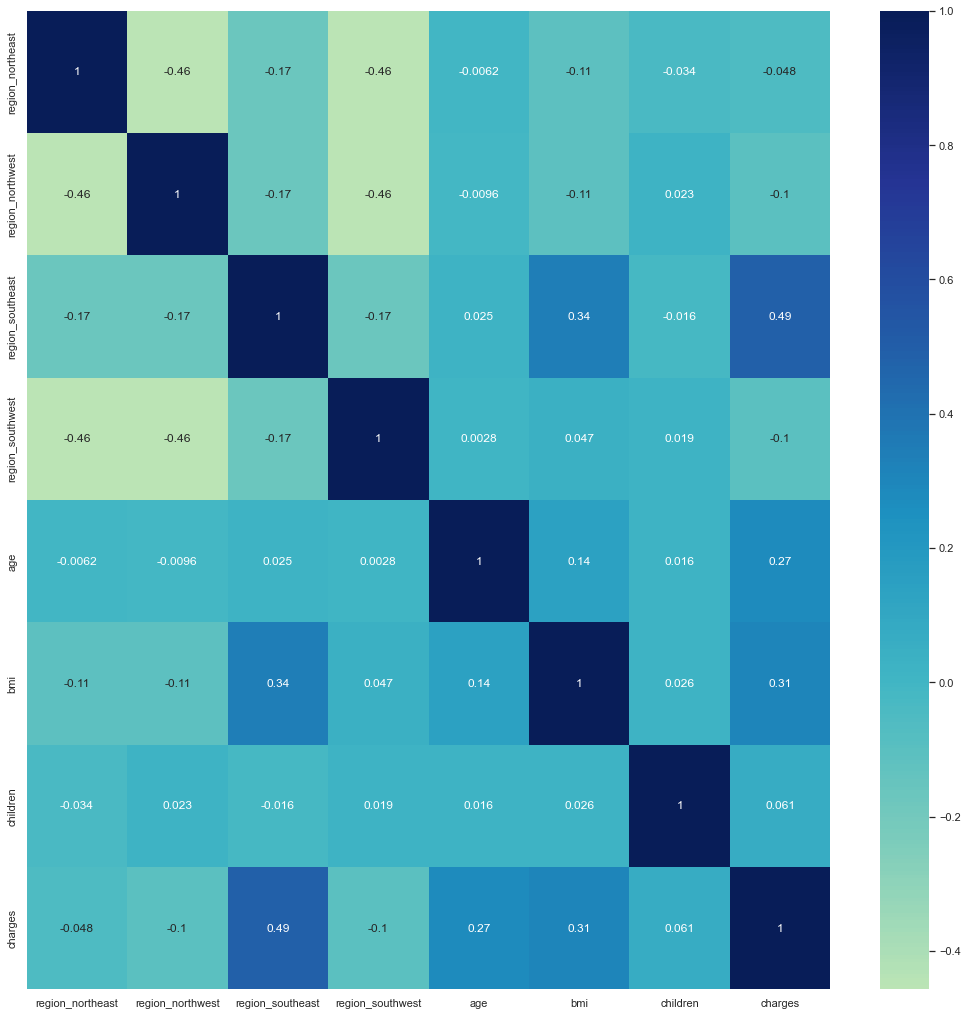

In [17]:
plt.figure(figsize=(18,18))
sns.heatmap(new_data.corr(),annot=True,center = 0,cmap="YlGnBu")
plt.show()

In [20]:
new_data.to_csv('./data/data_insurance.csv',index=False)